# Python

"Python is a widely used general-purpose, high level programming language.  It's design philosophy emphasizes code readability, and its syntax allows programmers to express concepts in fewer lines of code." - Wikipedia

Python started 25 years ago, version 2.0 was released in 2000, and Python 3.0 was released in 2008.  Although there are still many developers using 2.x, it will be phased out in 2020, and Python 3 is approaching critical mass.

## Pros
- Very high level
- Simplified syntax
- Belief that developer hours are more expensive than extra computer cycles
- Large library of additional tools
- Broad use in scientific communities
- Open Source
- Plays well with other languages/environments
- Full featured programming language as well as data manipulation and visualization

## Cons
- Learning curve is still steep
- Development isn't well funded
- Not as fast as lower level languages
- No UI
- Collaboration requires more setup
- Some libraries are still running on 2.x

## Python Philosophy

Here's an easter egg that's in every copy of Python.  At face value it's a fun addition, but it's also really valuable that such a large open-source project like this has a set of values driving it forward in a well-defined direction.  

In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


## A quick note about notebooks

This document is an iPython Notebook (now called Jupyter).  It is a development environment similar to working through the command line but with some modern conveniences.  

Each `In []:` can be executed seperately, and variables are carried over to be used throughout the whole instance.  Although I'm using this for demonstration purposes, it's fairly common to use this for doing your actual work in Python.

#####These *non-coded* boxes also have **some** really **_nifty_** `formatting` options.  ~~But no spelll checker~~ :)

## The Case For Less Syntax:
Here's an example of a really simple for loop in JS.

```
word = "cars";
letter = "t";
for (i = 0; i < word.length; i++) {
    if (word[i] == letter) { 
        console.log("Found the letter"); 
        break 
    }
}
```

There are common style conventions that you ought to practice in every language, but Python is one of the few that forces you write clean, well formatted code.  

I could have written:

```word = "cars"; letter = "t"; for (i = 0; i < word.length; i++) {if (word[i] == letter)
{console.log("Found the letter"); break } }
```

The below Python example has about half the non-letter characters that the java example has, and it can get even more concise.

In [6]:
word = 'cars'
letter = 's'
for c in word:
#for i in range(10)
    if c == letter:
        print("Letter was found")
        break


Letter was found


In [3]:
if 's' in 'cars':
    print('Letter was found')
    

Letter was found


Python is generally considered a fast language to program in because simplicity and beauty are at the core of how it's designed.  

- The indents for loops and conditional statements are mandatory
- New line actually communicates to the interpreter
- Quotes can be single ' ' or double " "

# Works well with others

Frequently data comes from the web or other sources where the format is out of our control.  It's important that a tool can easily itneract with other languages and systems well.  Programmers can easily pass code down to C using packages like Cython if they need the speed of a lower level language, or if they want to utilize already written code.  

Here's an example of some publicly available JSON data that we can use.

[usa.gov data from bit.ly](https://github.com/usagov/1.USA.gov-Data)


In [7]:
path = 'data/usagov_bitly_data2013-05-17-1368832207.txt'
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Linux; U; Android 4.1.2; en-us; HTC_PN071 Build\\/JZO54K) AppleWebKit\\/534.30 (KHTML, like Gecko) Version\\/4.0 Mobile Safari\\/534.30", "c": "US", "nk": 0, "tz": "America\\/Los_Angeles", "gr": "CA", "g": "15r91", "h": "10OBm3W", "l": "pontifier", "al": "en-US", "hh": "j.mp", "r": "direct", "u": "http:\\/\\/www.nsa.gov\\/", "t": 1368832205, "hc": 1365701422, "cy": "Anaheim", "ll": [ 33.816101, -117.979401 ] }\n'

Although this is very specifically formatted data, it fits really well into Python's dictionary schema.

Dictionary = { key : value, key2: value2 }
(the keys must be unique and immutable, but values can be any data type (lists, strings, numbers, sequences, other dictionaries...)

Below we'll import the json package and then use some really slick list iteration to accomplish a lot at once.  The path is opened, and then each line is passed to json.loads.  Each of these dictionaries is wrapped up into a list using [], and saved as records.  Let's take a look at the first record:

In [8]:
import json
records = [json.loads(line) for line in open(path)]
records[0]

{'a': 'Mozilla/5.0 (Linux; U; Android 4.1.2; en-us; HTC_PN071 Build/JZO54K) AppleWebKit/534.30 (KHTML, like Gecko) Version/4.0 Mobile Safari/534.30',
 'al': 'en-US',
 'c': 'US',
 'cy': 'Anaheim',
 'g': '15r91',
 'gr': 'CA',
 'h': '10OBm3W',
 'hc': 1365701422,
 'hh': 'j.mp',
 'l': 'pontifier',
 'll': [33.816101, -117.979401],
 'nk': 0,
 'r': 'direct',
 't': 1368832205,
 'tz': 'America/Los_Angeles',
 'u': 'http://www.nsa.gov/'}

In [9]:
print(len(records))
print(records[5]['r'])
print(records[15]['u'])

3959
direct
http://www.army.mil/article/103380/


Let's use Python to dive into the Time Zone data:

In [11]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec and rec['tz'] != ""]
print(time_zones[:10])

['America/Los_Angeles', 'America/Phoenix', 'America/Chicago', 'America/Indianapolis', 'America/Chicago', 'Australia/NSW', 'America/New_York', 'America/New_York', 'America/New_York', 'America/Los_Angeles']


We have a list of the time zone for every record.  Let's use a programming approach to generate a count of each unique time zone.  We'll even create our own function so that the code can be reused.

In [12]:
def get_counts(sequence):
    #input an iterable sequence, output a dict with a count
    #of each unique value
    counts = {}
    for x in sequence:
        counts.setdefault(x, 0) 
        counts[x] += 1
    return counts

counts = get_counts(time_zones)

print("Records: ", len(time_zones))
print("Unique Records: ", len(counts))
print("New York: ", counts['America/New_York'])
print("Madrid: ", counts['Europe/Madrid'])

Records:  3203
Unique Records:  110
New York:  903
Madrid:  21


Now we have the counts for every unique time zone.  I'd like to know which are the most popular time zones, but dictionaries can't be sorted.  We'll have to do some more manipulation to be able to pull out the most frequent values.  

In [13]:
def top_counts(count_dict, n):
    #input a dict and it will return a list of the N keys with the highest value
    #output is a list of tuples [(Value, Key)]
    value_key_pairs = [(value, key) for key, value in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

top_counts(counts, 10)

[(35, 'Europe/Moscow'),
 (40, 'America/Phoenix'),
 (50, 'America/Indianapolis'),
 (85, 'Europe/London'),
 (89, 'America/Denver'),
 (102, 'Asia/Tokyo'),
 (184, 'America/Puerto_Rico'),
 (421, 'America/Los_Angeles'),
 (686, 'America/Chicago'),
 (903, 'America/New_York')]

In [ ]:
example = {'Chicago': [1, 2, 3, 4, 5, 6], 'Madrid': [3,4,5]}

Although we can always use `Get_Counts` and `Top_Counts` in a similar situation, it would be very daunting to have to write your own library of commands. 

- Lends itself well to automation
- Dependencies need to be carefully packaged for sharing

As with many tasks in Python, someone else has already built a library to make this easier.

In [14]:
from collections import Counter
Counter(time_zones).most_common(10)

[('America/New_York', 903),
 ('America/Chicago', 686),
 ('America/Los_Angeles', 421),
 ('America/Puerto_Rico', 184),
 ('Asia/Tokyo', 102),
 ('America/Denver', 89),
 ('Europe/London', 85),
 ('America/Indianapolis', 50),
 ('America/Phoenix', 40),
 ('Europe/Moscow', 35)]

## Python as a real data manipulation platform

So far we're using Python as a programming language to engage with data.  The platform gained in popularity with data because of all the custom solutions that help in data processing, particularly: NumPy, Pandas, and MatPlotLib.  Let's look at that example done the right way.

In [15]:
from pandas import DataFrame, Series
import pandas as pd
frame = DataFrame(records)
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3959 entries, 0 to 3958
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3839 non-null object
al             3444 non-null object
c              3208 non-null object
cy             3208 non-null object
g              3839 non-null object
gr             3208 non-null object
h              3839 non-null object
hc             3839 non-null float64
hh             3839 non-null object
kw             86 non-null object
l              3839 non-null object
ll             3204 non-null object
nk             3839 non-null float64
r              3839 non-null object
t              3839 non-null float64
tz             3839 non-null object
u              3839 non-null object
dtypes: float64(4), object(14)
memory usage: 587.7+ KB


In [16]:
frame

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Linux; U; Android 4.1.2; en-us; H...,en-US,US,Anaheim,15r91,CA,10OBm3W,1365701422,j.mp,NaN,pontifier,"[33.816101, -117.979401]",0,direct,1368832205,America/Los_Angeles,http://www.nsa.gov/
1,NaN,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,en-us,None,NaN,ifIpBW,NaN,ifIpBW,1302189369,1.usa.gov,NaN,bitly,NaN,0,http://www.usa.gov/,1368832207,,http://answers.usa.gov/system/selfservice.cont...
2,NaN,Mozilla/5.0 (Windows NT 6.1; rv:21.0) Gecko/20...,"en-US,en;q=0.5",US,Fort Huachuca,10DaxOu,AZ,10DaxOt,1368814585,1.usa.gov,NaN,jaxstrong,"[31.5273, -110.360703]",1,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1368832209,America/Phoenix,http://www.saj.usace.army.mil/Media/NewsReleas...
3,NaN,Mozilla/5.0 (Linux; U; Android 4.1.2; en-us; S...,en-US,US,Houston,TysVFU,TX,TChsoQ,1354719206,1.usa.gov,NaN,o_5004fs3lvd,"[29.7633, -95.363297]",1,http://m.facebook.com/l.php?u=http%3A%2F%2F1.u...,1368832209,America/Chicago,https://nationalregistry.fmcsa.dot.gov/
4,NaN,Opera/9.80 (Android; Opera Mini/7.5.33286/29.3...,en,None,NaN,10IGW7m,NaN,10IGW7l,1368738258,1.usa.gov,NaN,peacecorps,NaN,0,http://t.co/CDO9hLTtNT,1368832208,,http://www.peacecorps.gov/learn/howvol/ab530gr...
5,NaN,Mozilla/5.0 (compatible; MSIE 10.0; Windows NT...,en-US,US,Mishawaka,13GrCeP,IN,13GrCeP,1368130510,1.usa.gov,NaN,bitly,"[41.612301, -86.1381]",0,direct,1368832209,America/Indianapolis,https://petitions.whitehouse.gov/petition/repe...
6,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) G...,"en-US,en;q=0.5",US,Hammond,YmtpnZ,WI,YmtpnZ,1363711958,1.usa.gov,NaN,bitly,"[45.007, -92.459099]",1,http://www.bwsd.k12.wi.us/SitePages/Home.aspx,1368832210,America/Chicago,http://pld.dpi.wi.gov/files/pld/images/LinkWI.png
7,NaN,Mozilla/5.0 (iPhone; U; CPU iPhone OS 4_3_5 li...,en-us,None,NaN,13oM0hV,NaN,15PUeH0,1368714329,go.nasa.gov,NaN,nasatwitter,NaN,0,http://t.co/YIsVhFDLj2,1368832211,,http://www.nasa.gov/multimedia/imagegallery/im...
8,NaN,Mozilla/5.0 (iPhone; CPU iPhone OS 6_1_3 like ...,en-us,AU,Sydney,15r91,02,10OBm3W,1365701422,j.mp,NaN,pontifier,"[-33.8615, 151.205505]",0,direct,1368832213,Australia/NSW,http://www.nsa.gov/
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",None,NaN,109LtDc,NaN,109LtDb,1368821840,go.nasa.gov,NaN,nasatwitter,NaN,0,http://t.co/yPSKO2t5v1,1368832215,,http://www.nasa.gov/mission_pages/sunearth/new...


`DataFrames` are flat tables, similar to a spreadsheet.  You can reference a column by it's header, and pull, filter, transform data.

In [17]:
frame['tz'].value_counts()

America/New_York                  903
America/Chicago                   686
                                  636
America/Los_Angeles               421
America/Puerto_Rico               184
Asia/Tokyo                        102
America/Denver                     89
Europe/London                      85
America/Indianapolis               50
America/Phoenix                    40
Europe/Moscow                      35
America/Rainy_River                33
Australia/NSW                      32
America/Sao_Paulo                  29
Europe/Paris                       27
Europe/Berlin                      24
America/Vancouver                  23
Australia/Victoria                 23
America/Mexico_City                22
Europe/Madrid                      21
Europe/Rome                        19
Chile/Continental                  16
America/Bogota                     16
Europe/Amsterdam                   15
Europe/Brussels                    14
America/Caracas                    13
Pacific/Hono

MatPlotLib is taken from MatLab and has a huge depth of visualization posibilities.  There are lots of customization opportunities, but they must be defined for every graph.

Populating the interactive namespace from numpy and matplotlib


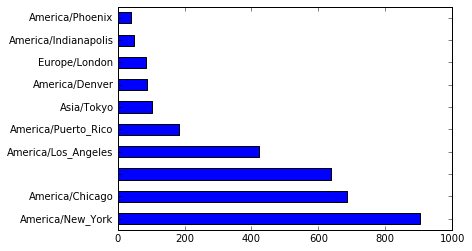

In [18]:
%pylab inline
tz_counts = frame['tz'].value_counts()
tz_counts[:10].plot(kind='barh')

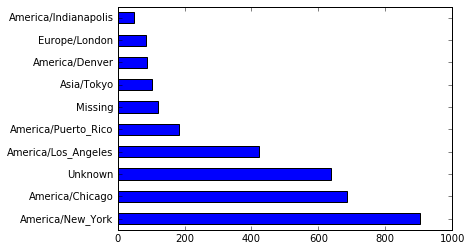

In [19]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
clean_tz_counts = clean_tz.value_counts()
clean_tz_counts[:10].plot(kind='barh')

In [20]:
browsers = Series([x.split()[0] for x in frame.a.dropna()])
browsers.value_counts()[:8]

Mozilla/5.0           3251
Mozilla/4.0            322
CakePHP                 38
ShortLinkTranslate      36
TVersity                30
Opera/9.80              28
Dalvik/1.6.0            19
Xenu                    15
dtype: int64

In [21]:
cframe = frame[frame.a.notnull()]
os = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')
os[:5]

array(['Not Windows', 'Windows', 'Windows', 'Not Windows', 'Not Windows'], 
      dtype='<U11')

In [22]:
by_tz_os = cframe.groupby(['tz', os])

In [23]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

,Not Windows,Windows
tz,,
,484,152
Africa/Cairo,0,3
Africa/Casablanca,0,1
Africa/Ceuta,4,2
Africa/Gaborone,0,1
Africa/Johannesburg,2,0
America/Anchorage,5,3
America/Argentina/Buenos_Aires,4,7
America/Argentina/Catamarca,1,0


In [24]:
indexer = agg_counts.sum(1).argsort()
indexer[:10]

tz
                                   55
Africa/Cairo                      101
Africa/Casablanca                 100
Africa/Ceuta                       36
Africa/Gaborone                    97
Africa/Johannesburg                42
America/Anchorage                  43
America/Argentina/Buenos_Aires     44
America/Argentina/Catamarca        47
America/Argentina/Cordoba          50
dtype: int64

In [25]:
count_subset = agg_counts.take(indexer)[-10:]
count_subset

,Not Windows,Windows
tz,,
America/Phoenix,22,18
America/Indianapolis,29,21
Europe/London,62,23
America/Denver,41,48
Asia/Tokyo,88,14
America/Puerto_Rico,93,91
America/Los_Angeles,207,214
,484,152
America/Chicago,343,343


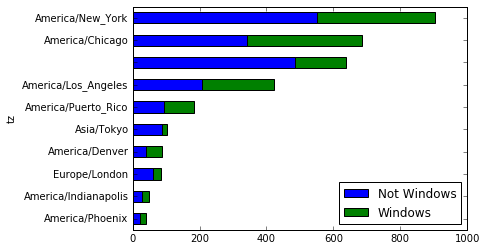

In [26]:
count_subset.plot(kind='barh', stacked=True)

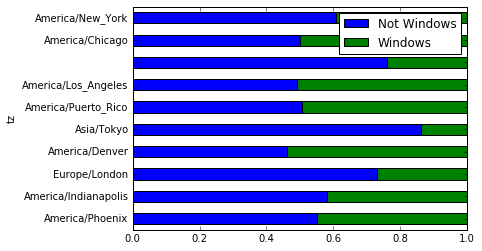

In [27]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0)
normed_subset.plot(kind='barh', stacked=True)

## A Personal Working Example

Here's an example of what I had to do to work through a set of data received from a client.  This wasn't a very clean and neat example, but hopefully it will better illustrate a more realistic workflow.

### Importing Data

In [ ]:
import pandas as pd
from pandas import DataFrame, Series
SalesData = pd.read_csv('data/SalesInputs/52WeekSalesbyStorebyDay.csv')
SalesData[:5]

Use the proper row as headers

In [ ]:
SalesData = pd.read_csv('data/SalesInputs/52WeekSalesbyStorebyDay.csv', header=1)
SalesData[:5]

There are still two headers of garbage based on the client's pivot tables.  We can index them out of the DataFrame.

In [ ]:
SalesData = pd.read_csv('data/SalesInputs/52WeekSalesbyStorebyDay.csv', header=1)
SalesData = SalesData.ix[2:]
SalesData[:5]


The very top cell is "Day of Week" but should represent be "Stores".  We can pull a list of column headers, modify one value, and then pass it back to the DataFrame.

In [ ]:
new_columns = SalesData.columns.values
new_columns[0] = "Store"
SalesData.columns = new_columns
SalesData[:5]


Python has a lot of great string operations capabilities, and we'll use this to clean up the City/State gunk in the first column.

In [ ]:
SalesData["Store"] = SalesData["Store"].str[2:7]
SalesData[:10]


Assign the store numbers as row labels (called Index)

In [ ]:
CleanSalesData = SalesData
CleanSalesData = SalesData.set_index('Store')
CleanSalesData[:8]

This is actually only one variable being categorized by both store and date.  Just to illustrate, we can unstack the data.  All of the blank entries for stores mean 'use the store number from above'.

In [ ]:
TestSales = CleanSalesData.stack()
TestSales


In [ ]:
len(TestSales)

We can quickly transpose the column headers with the dates using .T

In [ ]:
CleanSalesData = CleanSalesData.T
CleanSalesData

All of the sales values have $ and comma seperators.  Python interpreted them as strings and will create problems later if we try to perform operations on them.  We will replace any offending characters

In [ ]:
CleanSalesData = CleanSalesData.replace({"\$" : ""}, regex=True)
CleanSalesData = CleanSalesData.replace({",":""}, regex=True)
CleanSalesData = CleanSalesData.replace({" ":""}, regex=True)
CleanSalesData


In [ ]:
type(CleanSalesData["00001"]["2/16/2015"])

In [ ]:
CleanSalesData = CleanSalesData.convert_objects(convert_numeric=True)


In [ ]:
CleanSalesData["Sum"] = CleanSalesData.sum(axis=1, skipna=True)
CleanSalesData[:10]



In [ ]:
CleanSalesData.index = pd.to_datetime(CleanSalesData.index.values)
CleanSalesData

In [ ]:
%pylab inline
import matplotlib.pyplot as plt

In [ ]:
SumSales = CleanSalesData["Sum"]
SumSales.hist(bins=100, grid=False, figsize=(12,4))

In [ ]:
SumSales.plot(kind="line", figsize=(16,8), grid=False)


In [ ]:
CleanSalesData["Count"] = CleanSalesData.count(axis=1)
CountSales = CleanSalesData["Count"]
#print(CountSales.values)
#graph1 = SumSales.plot(kind="line", figsize=(16,8), grid=False)
#graph2 = graph1.twinx()
#CountSales.plot(kind="line", figsize=(16,8), grid=False)
#graph2.plot(CountSales.index,CountSales.values)
fig, ax1 = plt.subplots()
t = CountSales.index
s1 = CountSales.values
ax1.plot(t, s1, 'b-')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stores Reporting', color='b')
for t1 in ax1.get_yticklabels():
    t1.set_color('b')

ax2 = ax1.twinx()
s2 = SumSales.values
ax2.plot(t, s2, 'r-')
ax2.set_ylabel('Sales', color='r')
for t1 in ax2.get_yticklabels():
    t1.set_color('r')

fig.ylim = (0, 20000000)
fig.set_figheight(8)
fig.set_figwidth(16)



### Web Scraping

A quick example of libraries built for pulling JSON from the web.

In [ ]:
import pandas.io.data as web

all_data = {}
for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']:
    all_data[ticker] = web.get_data_yahoo(ticker)
#print(all_data)   
price = DataFrame({tic: data['Adj Close'] for tic, data in all_data.items()})
volume = DataFrame({tic: data['Volume'] for tic, data in all_data.items()})

returns = price.pct_change()
returns.tail()

In [ ]:
returns.plot(kind='line', ylim=[-.2,.2], yticks=[-.1,0,.1], legend=True, figsize=(16,8))

In [ ]:
macro = pd.read_csv('data/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
pd.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3, figsize=(12,12))

### API Connections
Python has libraries devoted specifically to API interactions, and may be a great area of experimentation.

In [28]:
import requests
url = 'https://api.github.com/repos/pydata/pandas/milestones/28/labels'
resp = requests.get(url)
data = resp.json()
issue_labels = DataFrame(data)
issue_labels

,color,name,url
0,e10c02,Bug,https://api.github.com/repos/pydata/pandas/lab...
1,4E9A06,Enhancement,https://api.github.com/repos/pydata/pandas/lab...
2,FCE94F,Refactor,https://api.github.com/repos/pydata/pandas/lab...
3,75507B,Build,https://api.github.com/repos/pydata/pandas/lab...
4,3465A4,Docs,https://api.github.com/repos/pydata/pandas/lab...
5,729FCF,Groupby,https://api.github.com/repos/pydata/pandas/lab...
6,06909A,Data IO,https://api.github.com/repos/pydata/pandas/lab...
7,8AE234,Visualization,https://api.github.com/repos/pydata/pandas/lab...
8,0b02e1,Indexing,https://api.github.com/repos/pydata/pandas/lab...
9,d7e102,Missing-data,https://api.github.com/repos/pydata/pandas/lab...


# Final Thoughts

- Open source is powerful
- Lots of libraries can be a double edged sword
- Python is a broad tool: 
    - Different formats for input and output
    - Data wrangling capabilities
    - Visualization
    - Web integration
- The lack of visuals is a challenge, but it has a payoff
    
If you want to get started, I would suggest using the [Anaconda](https://www.continuum.io/downloads) installer.  It will include all of the major libraries seen here as well as the iPython notebooks that this presentation is created in.

Github: Jankcious

# And now for something completely different:

The below was developed by [@sanand0](http://www.github.com/sanand0) who uses Python to generate some amazing things in PowerPoint, you can search youtube to watch his presentation.  A couple years ago at PyCon India 2013 he demoed the following and it blew my mind.  More of his examples can be found [here](http://nbviewer.jupyter.org/github/sanand0/ipython-notebooks/blob/master/Office.ipynb).

In [1]:
from TwitterAPI import TwitterAPI
import win32com.client
from MSO import *
from MSPPT import *
from MSPPTUtil import *

# I'm keeping my keys and secrets in a secret file.
from secret_twitter2 import consumer_key, consumer_secret, access_token_key, access_token_secret

#api = TwitterAPI(consumer_key, consumer_secret, auth_type = 'oAuth2')
api = TwitterAPI(consumer_key, consumer_secret, access_token_key, access_token_secret)

In [2]:
def draw_tweet(Base, item, pos):
    y = 40 + (pos % 4) * 120
    
    image = Base.Shapes.AddPicture(
        # To get the larger resolution image, just remove _normal from the URL
        item['user']['profile_image_url'].replace('_normal', ''),
        LinkToFile=True,
        SaveWithDocument=False,
        Left=20, Top=y,
        Width=100, Height=100)
    
    try:
        status = item['text']#.encode('cp037')
    except UnicodeEncodeError:
        try: 
            status = item['text'].encode('ascii')
        except UnicodeEncodeError:
            status = item['text']
        
    text = Base.Shapes.AddShape(msoShapeRectangle, 130, y, 460, 100)
    text.Fill.ForeColor.ObjectThemeColor = msoThemeColorText1
    text.Fill.ForeColor.Brightness = +0.95
    text.Line.Visible = msoFalse
    text.TextFrame.TextRange.Text = status
    text.TextFrame.TextRange.Font.Color.ObjectThemeColor = msoThemeColorText1
    text.TextFrame.TextRange.ParagraphFormat.Alignment = ppAlignLeft
    
    user = Base.Shapes.AddShape(msoShapeRectangle, 600, y, 100, 100)
    user.Fill.ForeColor.ObjectThemeColor = msoThemeColorAccent6
    user.Line.Visible = False
    user.TextFrame.TextRange.Text = '@' + item['user']['screen_name']

In [5]:
# Open PowerPoint
Application = win32com.client.Dispatch("PowerPoint.Application")

# Add a presentation
Presentation = Application.Presentations.Add()

# Add a slide with a blank layout (12 stands for blank layout)
Base = Presentation.Slides.Add(1, 25)
#Base = Presentation.Slides.Add(1, ppLayoutBlank)

r = api.request('statuses/filter', {'track': 'beer'})

#for pos, item in enumerate(r):
    #print(type(item))
#    if 'text' in item:
#        print(item['text'])
#    else: 
#        print(item)
#    if pos > 15:
#        break

for pos, item in enumerate(r):
    if 'text' in item:
        draw_tweet(Base, item, pos)
        print(item['text'])
    if pos > 12:
        break

I just earned the 'Not Your Father’s Root Beer' badge on @untappd! https://t.co/OtfphRzoAZ #NYFRB
RT @OntarioInCraft: Had the pleasure of sitting in with certified @cicerone Annette May and her guidance in off flavours today. #beer #cice…
I just earned the 'You're Extra Special' badge on @untappd! https://t.co/hoIa8YWTAr
Hanging out with my bro watching relevant with beer an popcorn #dope
"Odd" 23-Second Exercise Kills Beer Gut -Ad  https://t.co/4KvLadEvXL
chugging a nasty ass beer so I can get dronk lol
برداانين”جهنم بتدفيكم لاتستعجلون “̯*beer*
I just earned the 'Danish Delight (Level 3)' badge on @untappd! https://t.co/yfaJ8UR68i
@Enrique___16 lmao my mom knows i hate beer
RT @EarnKnowledge: This is how beer is canned https://t.co/KYhnvssfBO
@a_tacinelli  https://t.co/0Pu3IaEC6l
RT @EarnKnowledge: This is how beer is canned https://t.co/KYhnvsaEde
“@EarnKnowledge: This is how beer is canned https://t.co/XMl6NSi3Rx”knowledge
RT @RamosAlexiss: It's impossible to not drink beer if my fa